In [32]:
import pandas as pd
import numpy as np
import talib as ta
from pandas_datareader import data
import matplotlib.pyplot as plt
from pprint import pprint
import quandl

In [33]:
# # Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
# tickers = ['KOTAKBANK', 'LUPIN']
# # Define which online source one should use
# data_source = 'yahoo'
# # We would like all available data from 01/01/2000 until 12/31/2016.
# start_date = '2000-01-01'
# end_date = '2017-11-30'

# # User pandas_reader.data.DataReader to load the desired data. As simple as that.
# panel_data = data.DataReader(tickers, data_source, start_date, end_date)

# # Getting just the adjusted closing prices. This will return a Pandas DataFrame
# # The index in this DataFrame is the major index of the panel_data.
# close = panel_data.ix['Close']

# # Getting all weekdays between 01/01/2000 and 12/31/2016
# all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

# # How do we align the existing prices in adj_close with our new set of dates?
# # All we need to do is reindex close using all_weekdays as the new index
# close = close.reindex(all_weekdays)

# close.head(10)

In [96]:
mydata = quandl.get("NSE/KOTAKBANK", start_date="2013-01-01", end_date="2017-12-31")

In [97]:
mydata.tail()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2017-11-27,1029.9,1041.70,1023.50,1039.65,1036.45,970817.0,10000.68
2017-11-28,1036.0,1040.00,1026.10,1027.00,1029.85,734677.0,7593.69
2017-11-29,1028.9,1032.85,1022.00,1025.50,1026.25,1414642.0,14555.99
2017-11-30,1019.1,1020.40,996.15,1000.55,1000.30,2800528.0,28168.46
2017-12-01,1003.0,1011.75,1001.15,1006.00,1005.15,2879595.0,28970.00


In [98]:
def SMA(data, ndays):
    avg = data['Close'].rolling(window=ndays).mean()
    return avg

# Exponentially-weighted Moving Average 
def EWMA(data, ndays): 
 avg = data['Close'].ewm(span = ndays, min_periods = ndays - 1).mean()
 return avg

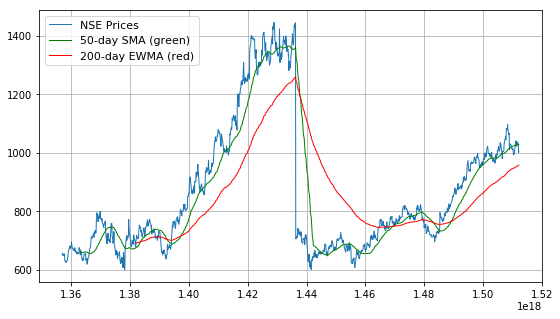

In [99]:
close = mydata['Close']

# Compute the 50-day SMA for NIFTY
n = 50
SMA_data = SMA(mydata,n)
SMA = SMA_data.dropna()
# print(SMA)

# Compute the 200-day EWMA for NIFTY
ew = 200
EWMA_data = EWMA(mydata,ew)
EWMA = EWMA_data.dropna()

# Plotting the NSE Price Series chart and Moving Averages below
plt.figure(figsize=(9,5))
plt.plot(mydata['Close'],lw=1, label='NSE Prices')
plt.plot(SMA,'g',lw=1, label='50-day SMA (green)')
plt.plot(EWMA,'r', lw=1, label='200-day EWMA (red)')
plt.legend(loc=2,prop={'size':11})
plt.grid(True)
# plt.setp(plt.gca().get_xticklabels(), rotation=30)
plt.show()

In [ ]:
sell_